In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [250]:
df_car = pd.read_csv("CarPrice.csv")
df_car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [251]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [252]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [253]:
df_car = df_car.drop(columns=['car_ID', 'CarName'])
df_car


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [254]:
df_car.fillna(df_car.median(),inplace = True)
df_car

C:\Users\ACER\AppData\Local\Temp\ipykernel_1328\4287157363.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_car.fillna(df_car.median(),inplace = True)


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [255]:
df_car_con = pd.DataFrame()
df_car_cat = pd.DataFrame()
for i in df_car:
    if df_car[i].dtypes != 'object':
        df_car_con[i] = df_car[i]
    else:
        df_car_cat[i] = df_car[i]

df_car_con
Y = df_car_con['price']
df_car_con = df_car_con.drop(columns=['price'])




In [256]:
df_car_con

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [257]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [258]:
scale = preprocessing.StandardScaler()
df_car_con = pd.DataFrame(scale.fit_transform(df_car_con.values), columns=['symboling','wheelbase','carlength','carwidth','carheight','curbweight'
,'enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg' ], index=df_car_con.index)
df_car_con

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


In [259]:
data = df_car_con.corr()
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201


<AxesSubplot:>

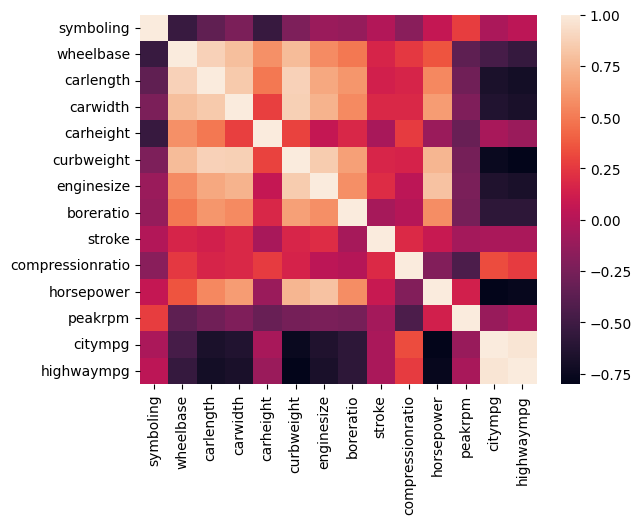

In [260]:
sns.heatmap(data)

In [261]:
lower = pd.DataFrame(np.tril(data, -1),columns = data.columns)
lower

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-0.531954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.357612,0.874587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,-0.232919,0.795144,0.841118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,-0.541038,0.589435,0.491029,0.279210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,-0.227691,0.776386,0.877728,0.867032,0.295572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,0.000000,0.000000,0.000000,0.000000,0.0


In [262]:
to_drop = [column for column in lower if any(lower[column] > 0.86)]
df_car_con.drop(to_drop, inplace=True, axis=1)
df_car_con

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059


In [263]:
df_car_cat

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [264]:
jimmy = pd.get_dummies(df_car_cat, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],drop_first=True)
jimmy

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
201,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
202,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
203,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [265]:
df_new = pd.DataFrame()
df_new = df_car_con.join(jimmy)
df_new

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,...,0,0,0,0,0,1,0,0,0,0


In [266]:
df_car_con

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900
...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059


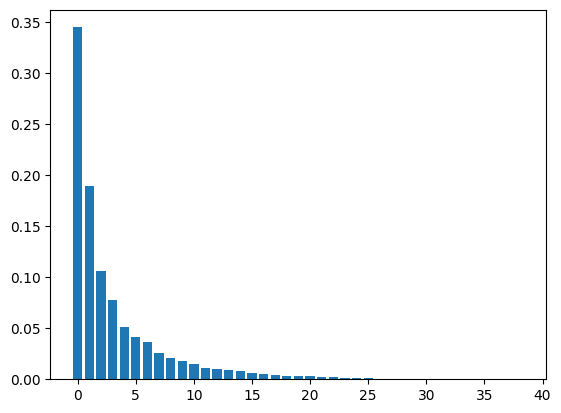

In [267]:
pca = PCA()
pca.fit_transform(df_new)
z = range(len(df_new.columns))
plt.bar(z,pca.explained_variance_ratio_)
plt.show()

In [268]:
print('Explained Variance ratio = ', pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) along row ')
print(pca.components_[0:10])

Explained Variance ratio =  [3.45306566e-01 1.89370357e-01 1.06175060e-01 7.77191654e-02
 5.14444501e-02 4.10070416e-02 3.62379101e-02 2.58767055e-02
 2.08461165e-02 1.76573368e-02 1.47095763e-02 1.15144145e-02
 9.78730891e-03 8.78468847e-03 8.42228001e-03 6.39787426e-03
 4.87033286e-03 3.82651417e-03 3.39434304e-03 3.06835813e-03
 2.75667195e-03 2.41009534e-03 1.88498708e-03 1.46744295e-03
 1.03460546e-03 9.07218197e-04 7.26594557e-04 4.91590184e-04
 4.10616924e-04 3.44661612e-04 2.92086600e-04 2.59245424e-04
 2.06181930e-04 1.66391957e-04 1.40927669e-04 4.72475622e-05
 3.70347588e-05 1.73014257e-33 1.73014257e-33]
Explained Variance (eigenvalues) =  [4.50262587e+00 2.46929527e+00 1.38446998e+00 1.01341926e+00
 6.70810042e-01 5.34711426e-01 4.72524324e-01 3.37419370e-01
 2.71822991e-01 2.30242890e-01 1.91805559e-01 1.50142239e-01
 1.27621640e-01 1.14547968e-01 1.09822342e-01 8.34250982e-02
 6.35067181e-02 4.98958416e-02 4.42605450e-02 4.00098639e-02
 3.59456311e-02 3.14264446e-02 2.45

In [269]:
pca2 = PCA(n_components=3)
X_pca_2 = pca2.fit_transform(df_new)
print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
print('Explained Variance (eigenvalues) = ', pca2.explained_variance_)
print('--------------------------------------------')
print('PCA2 components (eigenvectors) ')
print(pca2.components_[0:3])

Explained Variance ratio =  [0.34530657 0.18937036 0.10617506]
Explained Variance (eigenvalues) =  [4.50262587 2.46929527 1.38446998]
--------------------------------------------
PCA2 components (eigenvectors) 
[[-8.45134278e-02  9.86014339e-02  4.49956963e-01  4.22622870e-01
   3.58789538e-01  5.23105491e-02  7.23690228e-04  4.06495138e-01
  -9.01933726e-02 -4.07459405e-01 -8.90631801e-03  4.88598067e-02
  -2.92715364e-02  1.66068725e-02 -6.19382921e-02  2.10313184e-02
   1.55690171e-02 -1.63472149e-01  1.61556996e-01  9.54036792e-03
   4.84681349e-03  1.72065701e-02 -9.89851758e-02  5.62002710e-03
   4.92399983e-02 -1.61296377e-03  2.02316122e-02 -1.18090644e-01
   7.05918510e-02 -4.77428274e-03  6.79283795e-03 -1.61296377e-03
  -1.29364121e-01 -1.78335858e-03  8.90631801e-03  1.40209998e-03
   1.46150245e-01  5.71974023e-04  3.85613680e-05]
 [-4.28388336e-01  4.53317248e-01  9.47523803e-02 -1.65993138e-02
   3.94344899e-02  6.86880258e-02  4.41076065e-01 -2.43007494e-01
  -4.2901391

In [270]:
X = df_new


In [271]:
X

,symboling,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
1,1.743470,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.546059,...,0,0,0,0,0,0,0,1,0,0
2,0.133509,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.691627,...,0,0,0,0,0,0,0,1,0,0
3,0.938490,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.109354,...,0,0,0,0,0,0,0,1,0,0
4,0.938490,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.273900,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.400490,...,0,0,0,0,0,0,0,1,0,0
201,-1.476452,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.837195,...,0,0,0,0,0,0,0,1,0,0
202,-1.476452,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.128332,...,0,0,0,0,0,0,0,1,0,0
203,-1.476452,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,-0.546059,...,0,0,0,0,0,1,0,0,0,0


In [272]:
Rseed = 42
x_train_set, x_test, y_train_set, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)
x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)

In [273]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_validate)
y_test_pred_lr = lr.predict(x_test)


In [274]:
r2_score(y_pred_lr, y_validate)

0.6762926688966157

In [275]:
r2_score(y_test_pred_lr, y_test)

0.8114274547530808

In [276]:
lr.score(x_validate, y_validate)

0.7923861945520518

In [277]:
lr.score(x_test, y_test)

0.8443654641779235

In [278]:
x_n_component = ["5","10","15","20","25","30"]
for i in range (6):
    pca2 = PCA(n_components=(i+1)*5)
    X_pca_2 = pca2.fit_transform(df_new)
    x_n_component[i] = X_pca_2
print(x_n_component[1])
    


[[ 0.41616885 -2.1517262   0.14035548 ... -0.04758508 -0.90509698
  -0.45973432]
 [ 0.41616885 -2.1517262   0.14035548 ... -0.04758508 -0.90509698
  -0.45973432]
 [ 0.92132115 -1.23063503 -1.07798624 ...  1.23321314 -0.1988496
  -0.66742035]
 ...
 [ 2.64425906  0.09175905  1.93007    ...  0.06560306  0.1605314
  -0.3053796 ]
 [ 1.25047129  3.11882649 -1.59296171 ...  1.00857808 -0.64444966
   0.13125487]
 [ 2.08074373  0.74192282  1.37437356 ...  0.12197019 -0.18934683
  -0.07767748]]


In [279]:
r2accvalid = [0,5,10,15,20,25,30]
r2accvalid[0] = r2_score(y_pred_lr, y_validate)
r2acctest = [0,5,10,15,20,25,30]
r2acctest[0] = r2_score(y_test_pred_lr, y_test)


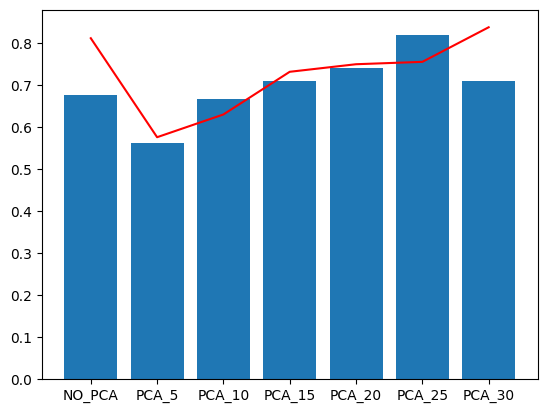

In [280]:
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = Rseed )
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
    # Perform Linear Regression -> All variables
    lr = LinearRegression()
    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    r2accvalid[i+1] = r2_score(y_pred_lr, y_validate)
    r2acctest[i+1] = r2_score(y_test_pred_lr, y_test)
plt.bar(["NO_PCA","PCA_5","PCA_10","PCA_15","PCA_20","PCA_25","PCA_30"],r2accvalid)
plt.plot(r2acctest,color= 'r')
plt.show()

In [281]:
msevalid = [0,5,10,15,20,25,30]
msevalid[0] = mean_squared_error(y_pred_lr, y_validate)
msetest = [0,5,10,15,20,25,30]
msetest[0] = mean_squared_error(y_test_pred_lr, y_test)

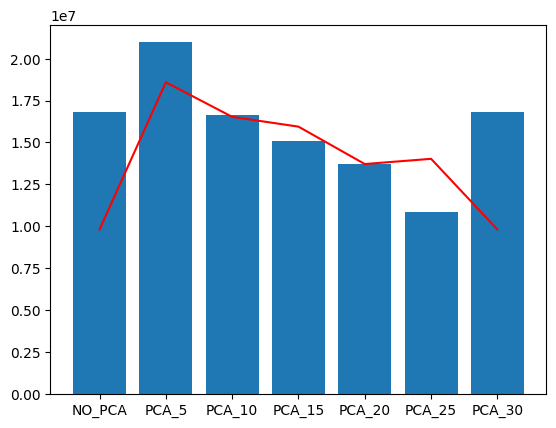

In [282]:
for i in range (6):
    x_train_set, x_test, y_train_set, y_test = train_test_split(x_n_component[i], Y, test_size = 0.3, random_state = Rseed)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
    # Perform Linear Regression -> All variables
    lr = LinearRegression()
    # train
    lr.fit(x_train, y_train)
    # validate
    y_pred_lr = lr.predict(x_validate)
    # test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    msevalid[i+1] = mean_squared_error(y_pred_lr, y_validate)
    msetest[i+1] = mean_squared_error(y_test_pred_lr, y_test)
plt.bar(["NO_PCA","PCA_5","PCA_10","PCA_15","PCA_20","PCA_25","PCA_30"],msevalid)
plt.plot(msetest,color = 'r')
plt.show()